In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. Load Data
# Load the CSV files into pandas DataFrames
# The df_matches DataFrame contains match data (e.g., results, teams, etc.)
# The final_standings DataFrame contains stats by matchday

df_matches = pd.read_csv('df_matches.csv')
final_standings = pd.read_csv('final_standings.csv')

In [3]:
# 3. Investigate Distributions and Outliers
print("\nDescriptive Statistics for Home and Away Goals:")
print(df_matches[['home_score', 'away_score']].describe())
# Filtering data for the matchday before 'U' Cluj vs CFR Cluj game
matchday_18_stats = final_standings[final_standings['matchday'] == 18]
print("\nDescriptive Statistics for Matchday 18:")
print(matchday_18_stats[['wins', 'draws', 'losses', 'goals_for', 'goals_against']].describe())


Descriptive Statistics for Home and Away Goals:
       home_score  away_score
count  152.000000  152.000000
mean     1.348684    1.032895
std      1.219379    0.958875
min      0.000000    0.000000
25%      0.000000    0.000000
50%      1.000000    1.000000
75%      2.000000    2.000000
max      6.000000    4.000000

Descriptive Statistics for Matchday 18:
            wins      draws     losses  goals_for  goals_against
count  16.000000  16.000000  16.000000  16.000000      16.000000
mean    5.937500   6.125000   5.937500  21.062500      21.062500
std     1.388944   2.028957   2.644964   5.284805       4.711245
min     4.000000   3.000000   3.000000  14.000000      15.000000
25%     5.000000   4.750000   3.750000  16.750000      18.500000
50%     5.500000   6.000000   5.500000  20.000000      19.500000
75%     7.000000   7.250000   8.250000  25.500000      24.250000
max     8.000000  10.000000  10.000000  30.000000      31.000000


In [4]:
# Identify potential outliers in the goals data
# Using the IQR (Interquartile Range) method
Q1_home = df_matches['home_score'].quantile(0.25)
Q3_home = df_matches['home_score'].quantile(0.75)
IQR_home = Q3_home - Q1_home
home_outliers = df_matches[(df_matches['home_score'] < (Q1_home - 1.5 * IQR_home)) | (df_matches['home_score'] > (Q3_home + 1.5 * IQR_home))]

Q1_away = df_matches['away_score'].quantile(0.25)
Q3_away = df_matches['away_score'].quantile(0.75)
IQR_away = Q3_away - Q1_away
away_outliers = df_matches[(df_matches['away_score'] < (Q1_away - 1.5 * IQR_away)) | (df_matches['away_score'] > (Q3_away + 1.5 * IQR_away))]

print("\nIQR limits for home team goals are:")
print("\nQ1, Q3:")
print(Q1_home, Q3_home)
print("\nIQR limits for away team goals are:")
print("\nQ1, Q3:")
print(Q1_away, Q3_away)
print("\nHome Goals Outliers:")
print(home_outliers)
print("\nAway Goals Outliers:")
print(away_outliers)


IQR limits for home team goals are:

Q1, Q3:
0.0 2.0

IQR limits for away team goals are:

Q1, Q3:
0.0 2.0

Home Goals Outliers:
   matchday          date        home_team  away_team  home_score  away_score  \
62  Runda 8  31.08. 18:30  FC Hermannstadt  Poli Iasi           6           2   

    matchday_num  
62             8  

Away Goals Outliers:
Empty DataFrame
Columns: [matchday, date, home_team, away_team, home_score, away_score, matchday_num]
Index: []


In [5]:
# Filter the data for U Cluj and CFR Cluj
filter_ucj = ["'U' Cluj"]
df_matches_ucj = df_matches[
    df_matches['home_team'].isin(filter_ucj) | df_matches['away_team'].isin(filter_ucj)
]
filter_cfr = ['CFR Cluj']
df_matches_cfr = df_matches[
    df_matches['home_team'].isin(filter_cfr) | df_matches['away_team'].isin(filter_cfr)
]

In [6]:
# Identify potential outliers in the goals data for 'U' Cluj
Q1_home = df_matches_ucj['home_score'].quantile(0.25)
Q3_home = df_matches_ucj['home_score'].quantile(0.75)
IQR_home = Q3_home - Q1_home
home_outliers = df_matches_ucj[(df_matches_ucj['home_score'] < (Q1_home - 1.5 * IQR_home)) | (df_matches_ucj['home_score'] > (Q3_home + 1.5 * IQR_home))]

Q1_away = df_matches_ucj['away_score'].quantile(0.25)
Q3_away = df_matches_ucj['away_score'].quantile(0.75)
IQR_away = Q3_away - Q1_away
away_outliers = df_matches_ucj[(df_matches_ucj['away_score'] < (Q1_away - 1.5 * IQR_away)) | (df_matches_ucj['away_score'] > (Q3_away + 1.5 * IQR_away))]

print("\nIQR limits for 'U' Cluj as home team goals are:")
print("\nQ1, Q3:")
print(Q1_home, Q3_home)
print("\nIQR limits for 'U' Cluj as away team goals are:")
print("\nQ1, Q3:")
print(Q1_away, Q3_away)
print("\nHome Goals Outliers:")
print(home_outliers)
print("\nAway Goals Outliers:")
print(away_outliers)


IQR limits for 'U' Cluj as home team goals are:

Q1, Q3:
0.5 2.0

IQR limits for 'U' Cluj as away team goals are:

Q1, Q3:
0.0 2.0

Home Goals Outliers:
Empty DataFrame
Columns: [matchday, date, home_team, away_team, home_score, away_score, matchday_num]
Index: []

Away Goals Outliers:
Empty DataFrame
Columns: [matchday, date, home_team, away_team, home_score, away_score, matchday_num]
Index: []


In [7]:
# Identify potential outliers in the goals data for CFR Cluj
Q1_home = df_matches_cfr['home_score'].quantile(0.25)
Q3_home = df_matches_cfr['home_score'].quantile(0.75)
IQR_home = Q3_home - Q1_home
home_outliers = df_matches_cfr[(df_matches_cfr['home_score'] < (Q1_home - 1.5 * IQR_home)) | (df_matches_cfr['home_score'] > (Q3_home + 1.5 * IQR_home))]

Q1_away = df_matches_cfr['away_score'].quantile(0.25)
Q3_away = df_matches_cfr['away_score'].quantile(0.75)
IQR_away = Q3_away - Q1_away
away_outliers = df_matches_cfr[(df_matches_cfr['away_score'] < (Q1_away - 1.5 * IQR_away)) | (df_matches_cfr['away_score'] > (Q3_away + 1.5 * IQR_away))]

print("\nIQR limits for CFR Cluj as home team goals are:")
print("\nQ1, Q3:")
print(Q1_home, Q3_home)
print("\nIQR limits for CFR Cluj as away team goals are:")
print("\nQ1, Q3:")
print(Q1_away, Q3_away)
print("\nHome Goals Outliers:")
print(home_outliers)
print("\nAway Goals Outliers:")
print(away_outliers)


IQR limits for CFR Cluj as home team goals are:

Q1, Q3:
0.0 2.5

IQR limits for CFR Cluj as away team goals are:

Q1, Q3:
1.0 2.0

Home Goals Outliers:
Empty DataFrame
Columns: [matchday, date, home_team, away_team, home_score, away_score, matchday_num]
Index: []

Away Goals Outliers:
Empty DataFrame
Columns: [matchday, date, home_team, away_team, home_score, away_score, matchday_num]
Index: []


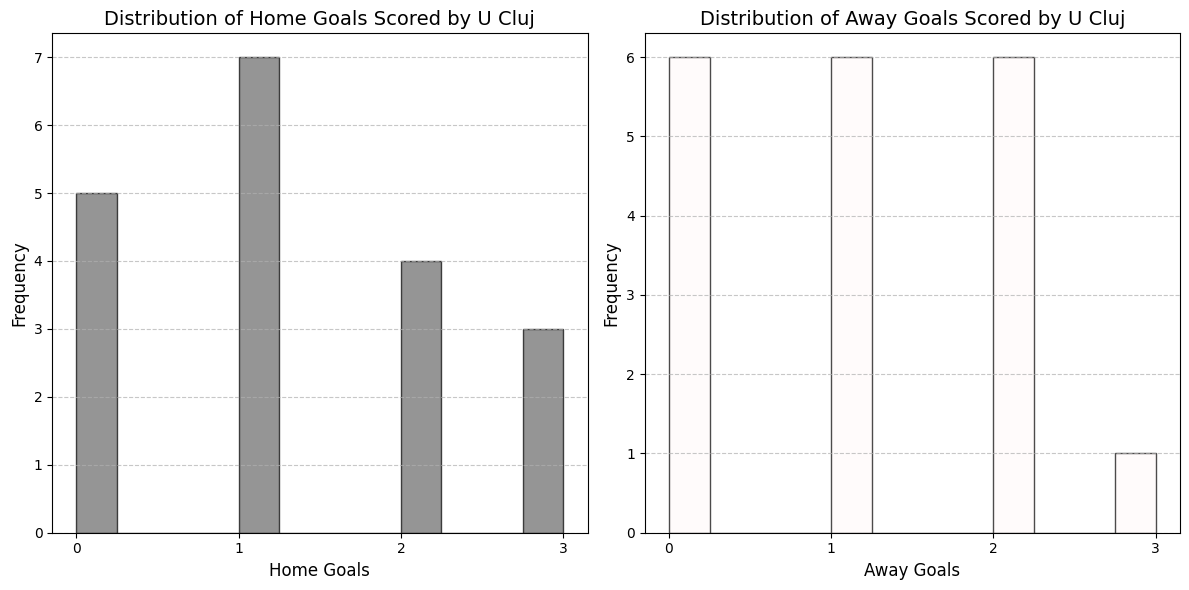

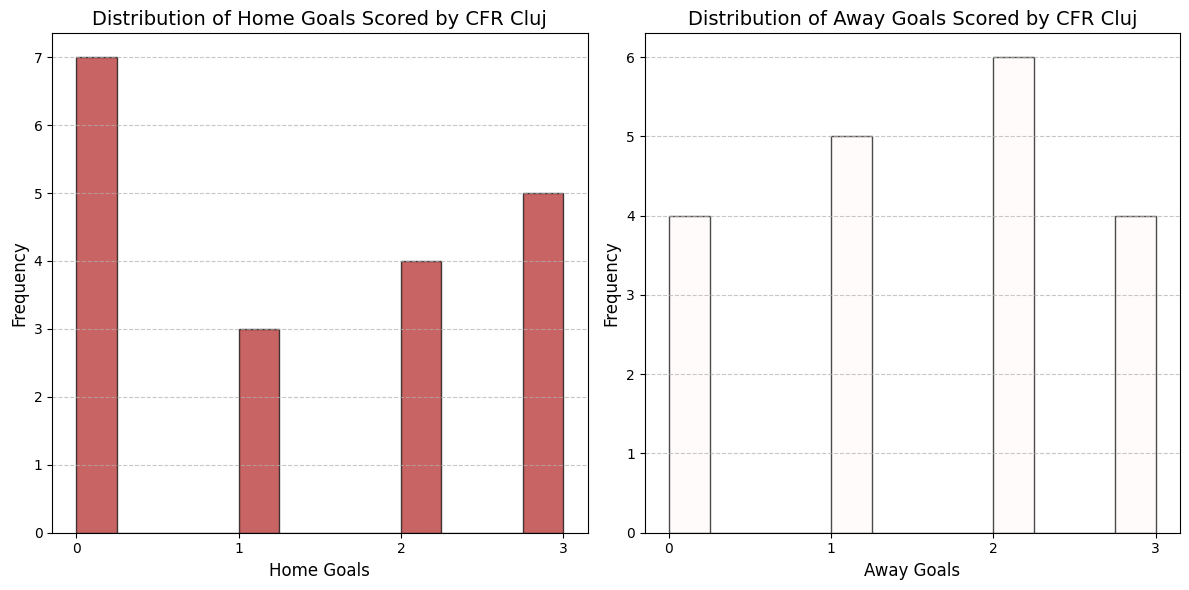

In [8]:
# Visualize distributions of goals for 'U' Cluj
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)

# Home Goals Histogram for 'U' Cluj
ax1.hist(df_matches_ucj['home_score'], bins=12, alpha=0.7, color='dimgray', edgecolor='black')
ax1.set_title('Distribution of Home Goals Scored by U Cluj', fontsize=14)
ax1.set_xlabel('Home Goals', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(np.arange(0, df_matches_ucj['home_score'].max() + 1, 1.0))

# Away Goals Histogram for 'U' Cluj
ax2.hist(df_matches_ucj['away_score'], bins=12, alpha=0.7, color='snow', edgecolor='black')
ax2.set_title('Distribution of Away Goals Scored by U Cluj', fontsize=14)
ax2.set_xlabel('Away Goals', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticks(np.arange(0, df_matches_ucj['away_score'].max() + 1, 1.0))

plt.show()

# Visualize distributions of goals for CFR Cluj
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)

# Home Goals Histogram for CFR Cluj
ax1.hist(df_matches_cfr['home_score'], bins=12, alpha=0.7, color='firebrick', edgecolor='black')
ax1.set_title('Distribution of Home Goals Scored by CFR Cluj', fontsize=14)
ax1.set_xlabel('Home Goals', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(np.arange(0, df_matches_ucj['home_score'].max() + 1, 1.0))

# Away Goals Histogram for CFR Cluj
ax2.hist(df_matches_cfr['away_score'], bins=12, alpha=0.7, color='snow', edgecolor='black')
ax2.set_title('Distribution of Away Goals Scored by CFR Cluj', fontsize=14)
ax2.set_xlabel('Away Goals', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticks(np.arange(0, df_matches_ucj['away_score'].max() + 1, 1.0))

plt.show()

Text(0.5, 0, 'Goal Types')

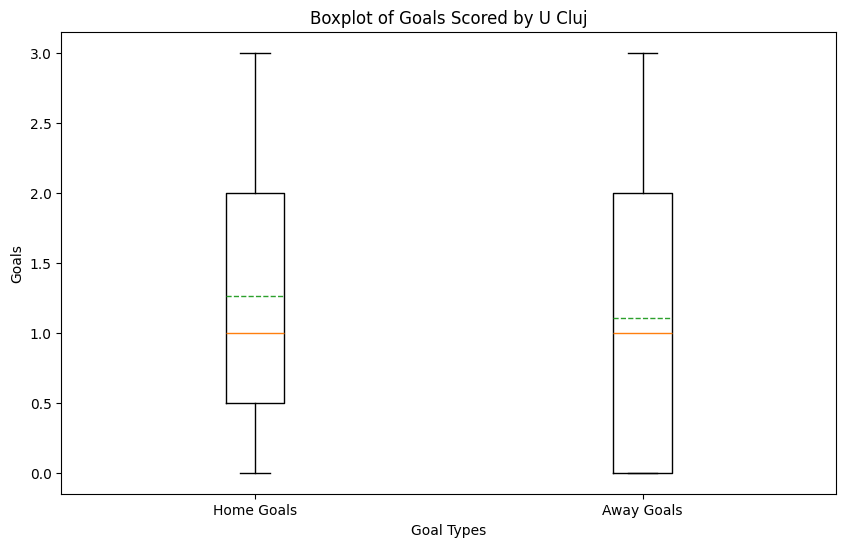

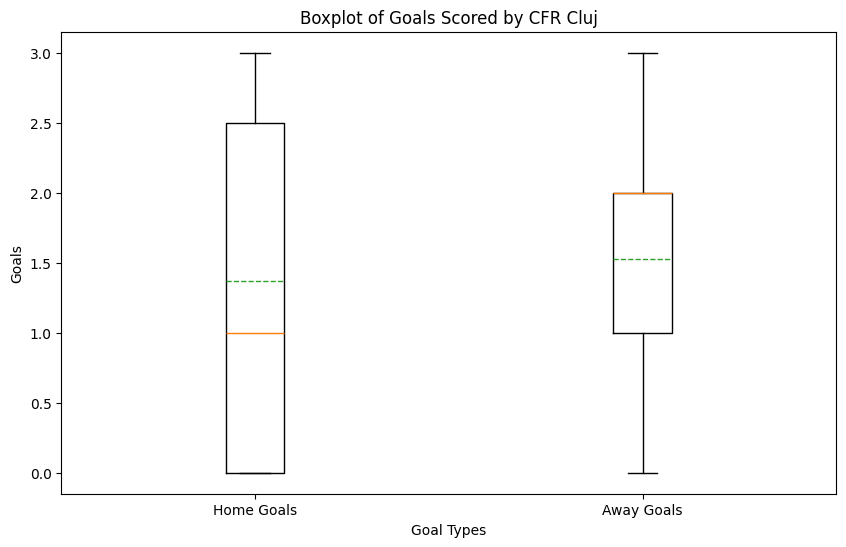

In [9]:
# Boxplot visualization for outliers
# For 'U' Cluj
plt.figure(figsize=(10, 6))
box = plt.boxplot([df_matches_ucj['home_score'], df_matches_ucj['away_score']], labels=['Home Goals', 'Away Goals'], showmeans=True, meanline=True)
plt.title('Boxplot of Goals Scored by U Cluj')
plt.ylabel('Goals')
plt.xticks([1, 2], ['Home Goals', 'Away Goals'])
plt.xlabel('Goal Types')

# For CFR Cluj
plt.figure(figsize=(10, 6))
box = plt.boxplot([df_matches_cfr['home_score'], df_matches_cfr['away_score']], labels=['Home Goals', 'Away Goals'], showmeans=True, meanline=True)
plt.title('Boxplot of Goals Scored by CFR Cluj')
plt.ylabel('Goals')
plt.xticks([1, 2], ['Home Goals', 'Away Goals'])
plt.xlabel('Goal Types')

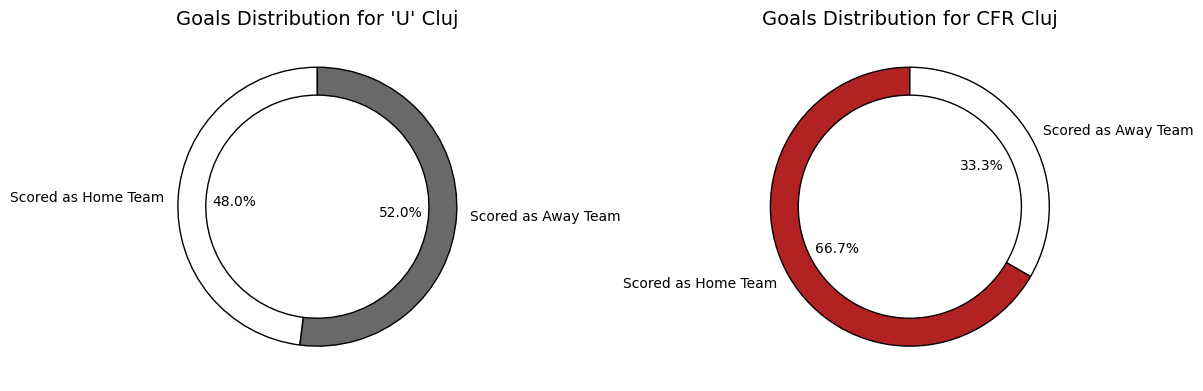

In [10]:
# Filtering matches until matchday 19 (before the game between 'U' Cluj and CFR Cluj)
df_goals_for = df_matches[df_matches['matchday'] != "Runda 19"]

# Donut charts to analyze goals scored by 'U' Cluj and CFR Cluj
teams = ["'U' Cluj", 'CFR Cluj']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, team, colors in zip(axes, teams, [['white', 'dimgray'], ['firebrick', 'white']]):
    # Calculate goals for the filtered data
    home_goals = df_goals_for[df_goals_for['home_team'] == team]['home_score'].sum()
    away_goals = df_goals_for[df_goals_for['away_team'] == team]['away_score'].sum()
    total_goals = home_goals + away_goals

    ax.pie(
        [home_goals, away_goals],
        labels=['Scored as Home Team', 'Scored as Away Team'],
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.2, edgecolor='black')
    )
    ax.set_title(f'Goals Distribution for {team}', fontsize=14)

plt.tight_layout()
plt.show()

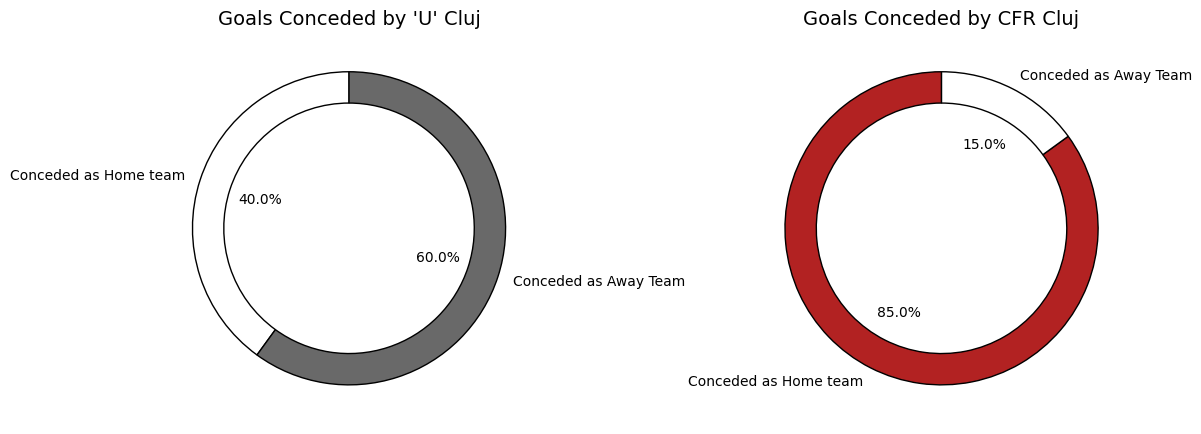

In [11]:
# Filtering matches until matchday 19 (before the game between 'U' Cluj and CFR Cluj)
df_goals_against = df_matches[df_matches['matchday'] != "Runda 19"]

# Donut charts to analyze goals conceded by 'U' Cluj and CFR Cluj
teams = ["'U' Cluj", 'CFR Cluj']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, team, colors in zip(axes, teams, [['white', 'dimgray'], ['firebrick', 'white']]):
    # Calculate goals conceded for the filtered data
    home_conceded = df_goals_against[df_goals_against['home_team'] == team]['away_score'].sum()  # Goals conceded at home
    away_conceded = df_goals_against[df_goals_against['away_team'] == team]['home_score'].sum()  # Goals conceded away
    total_conceded = home_conceded + away_conceded

    ax.pie(
        [home_conceded, away_conceded],
        labels=['Conceded as Home team', 'Conceded as Away Team'],
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.2, edgecolor='black')
    )
    ax.set_title(f'Goals Conceded by {team}', fontsize=14)

plt.tight_layout()
plt.show()

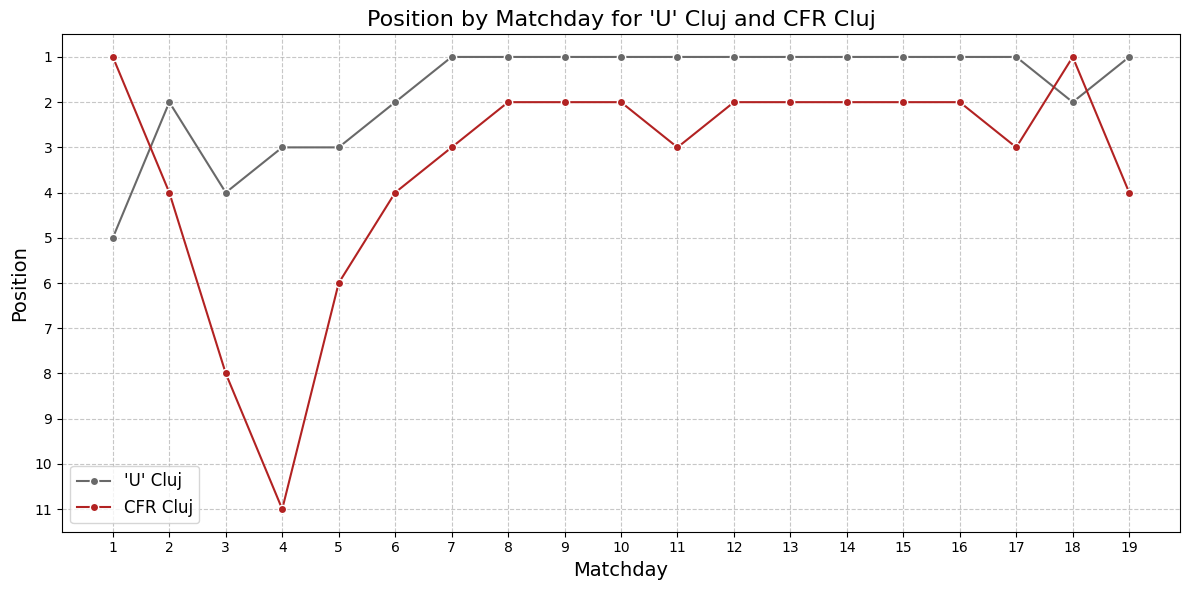

In [13]:
# Analyze position by matchday for 'U' Cluj and CFR Cluj
positions_filtered = final_standings[final_standings['team'].isin(["'U' Cluj", 'CFR Cluj'])]
plt.figure(figsize=(12, 6))
for team, color, edge in zip(["'U' Cluj", 'CFR Cluj'], ['dimgray', 'firebrick'], ['white', 'white']):
    team_data = positions_filtered[positions_filtered['team'] == team]
    plt.plot(team_data['matchday'], team_data['position'], label=team, marker='o', linestyle='-', color=color, markeredgecolor=edge, markerfacecolor=color, linewidth=1.5)

plt.gca().invert_yaxis()  # Invert y-axis since lower position is better
plt.xticks(np.arange(positions_filtered['matchday'].min(), positions_filtered['matchday'].max() + 1, 1))
plt.yticks(np.arange(positions_filtered['position'].min(), positions_filtered['position'].max() + 1, 1))
plt.title("Position by Matchday for 'U' Cluj and CFR Cluj", fontsize=16)
plt.xlabel('Matchday', fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()